In [14]:
%matplotlib inline
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
sns.set(style="ticks")

property = pd.read_csv('~/Desktop/PythonLearning/BurlingtonPropertyDetails.csv')
property.head()

,ParcelID,AccountNumber,SpanNumber,StreetNumber,CuO1LastName,CuO1FirstName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,...,SalePrice,NumofRooms,NumofBedrooms,Bath1,Bath2,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint
0,046-1-013-000,6416,114-035-16416,184,BRACE,WILLIAM H,2 Family,0.34,3344.0,1609.50,...,NaN,10,4,2,0,2,NACR,BS,0.30,"(-73.191, 44.48612)"
1,054-2-013-000,8950,114-035-18950,36,"DOMINIC PROPERTIES, LLC",NaN,2 Family,0.13,3000.0,1440.00,...,327000.0,8,4,2,0,2,RL,BS,0.25,"(-73.2074, 44.46423)"
2,021-2-080-000,147,114-035-10147,21,LYON,CASEY J D ET LA,2 Family,0.44,3053.0,1430.25,...,159500.0,8,4,2,0,2,RL,C,0.30,"(-73.2681, 44.52544)"
3,049-3-059-000,7285,114-035-17285,214,CARPENTER,CATHERINE R,2 Family,0.08,4724.0,2416.00,...,NaN,10,3,2,0,2,RH,BS,0.40,"(-73.2106, 44.47399)"
4,046-2-001-000,6667,114-035-16667,106,ALSTON,W KEMPER,2 Family,0.26,5203.0,2516.00,...,NaN,9,4,2,0,2,I,BS,0.30,"(-73.196, 44.48118)"


http://blog.josephmisiti.com/help-commands-for-doing-machine-learning-in-python


In [ ]:
train_df = property

In [ ]:
# This takes the age and breaks it into precentiles
print(np.percentile(train_df['CurrentAcres'],[0,33,66,100]))
# print(np.percentile(test_df['CurrentAcres'],[0,33,66,100]))
farepercentile = [0, .09, .19, 29]

# Creates a new column binning the ages in to brackets and labeling them with numbers.  
# Prencentiles In this case are 0-7, 7=14, 14-31 and 31-513)
train_df["CurrentAcresBin"] = pd.cut(train_df['CurrentAcres'],farepercentile, labels=["Low","Mid","High"])
#test_df["CurrentAcresBin"] = pd.cut(test_df['CurrentAcres'],farepercentile, labels=["Low","Mid","High"])

# plot the result
sns.swarmplot(x="CurrentAcresBin", y="SalePrice", hue="Bath1", data=train_df)
plt.show()

[  0.     0.09   0.19  28.66]


In [ ]:
AgeBin = pd.get_dummies( test_df['AgeBin'] , prefix = 'AgeBin')

Age = test_df['Age']


In [ ]:
test_X = pd.concat([Age , Fare, SibSp , Parch, Pclass, AgeBin, FareBin, Embarked, Title, Sex], axis=1)
test_X.head()

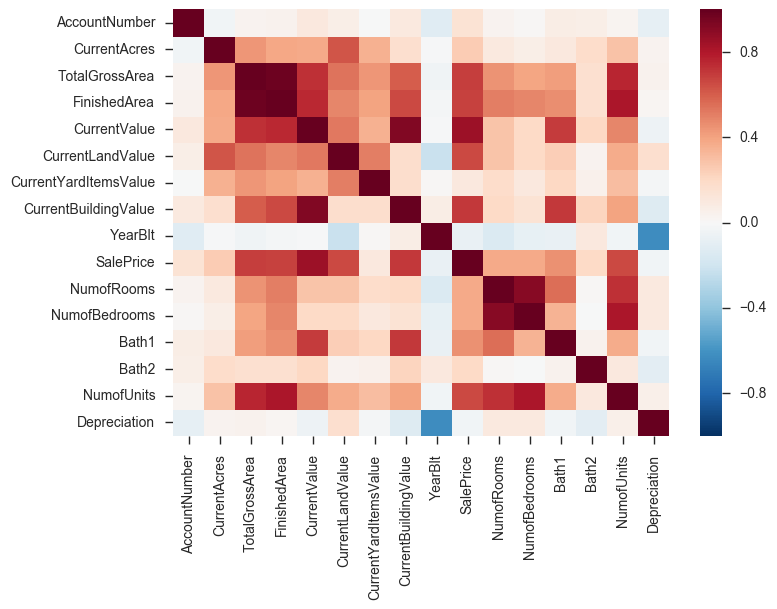

AccountNumber            0.143091
CurrentAcres             0.251245
TotalGrossArea           0.691055
FinishedArea             0.680884
CurrentValue             0.855202
CurrentLandValue         0.659302
CurrentYardItemsValue    0.102848
CurrentBuildingValue     0.707995
YearBlt                 -0.072022
SalePrice                1.000000
NumofRooms               0.380052
NumofBedrooms            0.379664
Bath1                    0.453190
Bath2                    0.199447
NumofUnits               0.661753
Depreciation            -0.033848
Name: SalePrice, dtype: float64

In [6]:
corr = property.corr()
sns.heatmap(corr)
plt.show()

property.corr()['SalePrice']

In [2]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = train_X
# This is the value that you have and need to discover in the test set
train_valid_y = train_df.SaleValue
# This it the test set
test_X = test_X


train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
     y,
     test_size=0.4,
     random_state=0)


NameError: name 'train_X' is not defined

In [ ]:
model = RandomForestClassifier(n_estimators=700,min_samples_leaf=3)
# model = SVC()
# model = GradientBoostingClassifier()
# model = KNeighborsClassifier(n_neighbors = 3)
# model = GaussianNB()
# model = LogisticRegression()

In [ ]:
model.fit( train_X , train_y )

In [ ]:
# Score the model
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

In [ ]:
test_Y = model.predict( test_X )
passenger_id = test_df.PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head(10)
#test.to_csv( 'titanic_pred.csv' , index = False )